# Performance analysis of multiple supervised learning methods for solving a binary classification problem

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Reading Data

In [2]:
Diabetes_Data= pd.read_excel('diabetes.xlsx')
Diabetes_Data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
pd.set_option('display.max_rows', Diabetes_Data.shape[0]+1) # just to see all the data when the Dataframe is called without head()
Diabetes_Data.describe() # describing the distribution of data

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
Diabetes_Data.groupby('Outcome').count() # Checking if the data is imbalanced (that is if number of 0 outcomes are same as 1 )

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268

### Data preprocessing

In [5]:

# Changing the 0 values to Nan , except pregnancy and outcome columns , as 0 pregnancies is a posibility , and outcome is a class

for col in Diabetes_Data.columns:
    if str(col) == "Outcome" or str(col) == "Pregnancies":
        pass
    else:
        Diabetes_Data[str(col)]= Diabetes_Data[str(col)].replace(0,np.nan)

Diabetes_Data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Imputting NaN fields with mean values

In [6]:
# Creating a function which replaces nan values with mean 
def mean_target(var):   
    temp = Diabetes_Data[Diabetes_Data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [8]:
# Replacing nan with mean for each coloumn based on the outcome 
# taking all values of a coloumn where outcome is 1,  taking their mean and replacing the Nan value in that coloumn wit the mean if outcome is 1 
# similary for 0 , repeating this for all coloumns  
for col in Diabetes_Data.columns:
    if col != 'Outcome' and col != 'Pregnancies':  
        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 0 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][0]
        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 1 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][1]

Diabetes_Data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0           35.0  206.846154  33.6   
1            1     85.0           66.0           29.0  130.287879  26.6   
2            8    183.0           64.0           33.0  206.846154  23.3   
3            1     89.0           66.0           23.0   94.000000  28.1   
4            0    137.0           40.0           35.0  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1

### Inputting NaN with Knn inputter


Uncomment the 2 cells below  to  see how  KNN imputer works on the data , make sure to comment the above two cells before running  

In [ ]:
# Using Knn to input missing values by taking 5 nearest neighbours and taking average of them to fill in the missing value.
""" from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
After_imputation = imputer.fit_transform(Diabetes_Data) """

In [ ]:
""" 
df= pd.DataFrame(After_imputation,columns=col_list)
Diabetes_Data=df
Diabetes_Data.head() """

In [9]:
# checking for nulls
Diabetes_Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling Outliers

<Figure size 800x600 with 0 Axes>

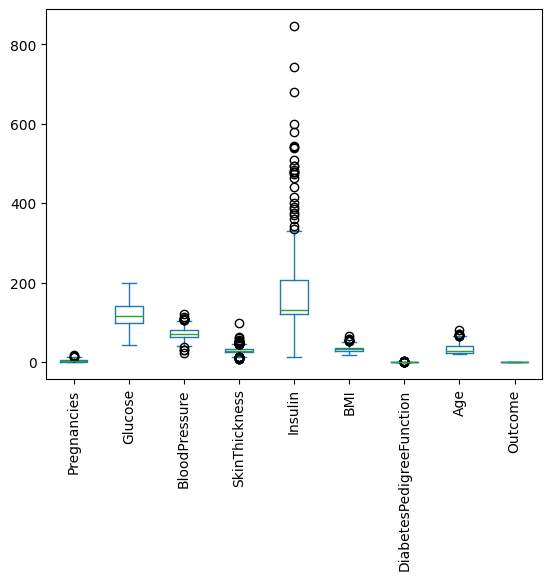

In [10]:
# Box Plotting of the dataset 
figure(figsize=(8, 6))
Diabetes_Data.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Removing data with Z score > 3 (keeping 99.7 percentile)

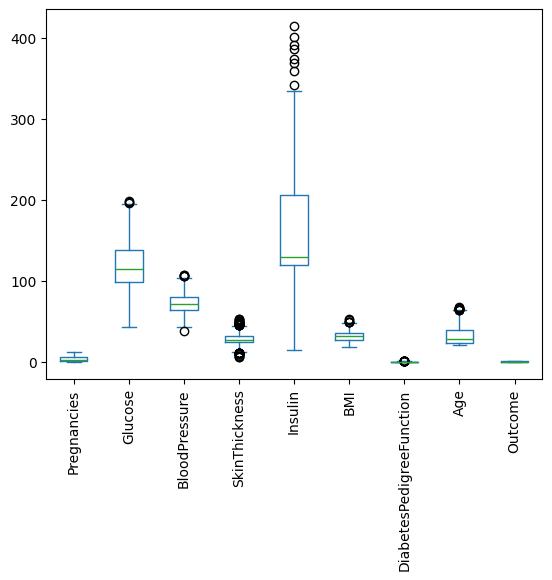

In [11]:

keys=[]
outlier_index=[]


for col in Diabetes_Data.columns:  # iterating through all the coloumns 

    z=abs((Diabetes_Data[col]-Diabetes_Data[col].mean())/Diabetes_Data[col].std()) # calculating Z- Score of each coloumn

    keys += np.where(z>3)[0].tolist()

# creating index of Outliers 
for k in keys:
    if k not in outlier_index:

        outlier_index.append(k)   

outlier_index.sort()


Cleaned_Data = Diabetes_Data.drop(outlier_index) # removing those indexes 

# ploting the box plot to visualize  
Cleaned_Data.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [12]:

Diabetes_Data= Cleaned_Data
Diabetes_Data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  206.846154  33.6   
1            1     85.0           66.0      29.000000  130.287879  26.6   
2            8    183.0           64.0      33.000000  206.846154  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
5            5    116.0           74.0      27.235457  130.287879  25.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
5                     0.201  30.0        0

### Visualizing the data and Interdependance using Pairplot and Heat map

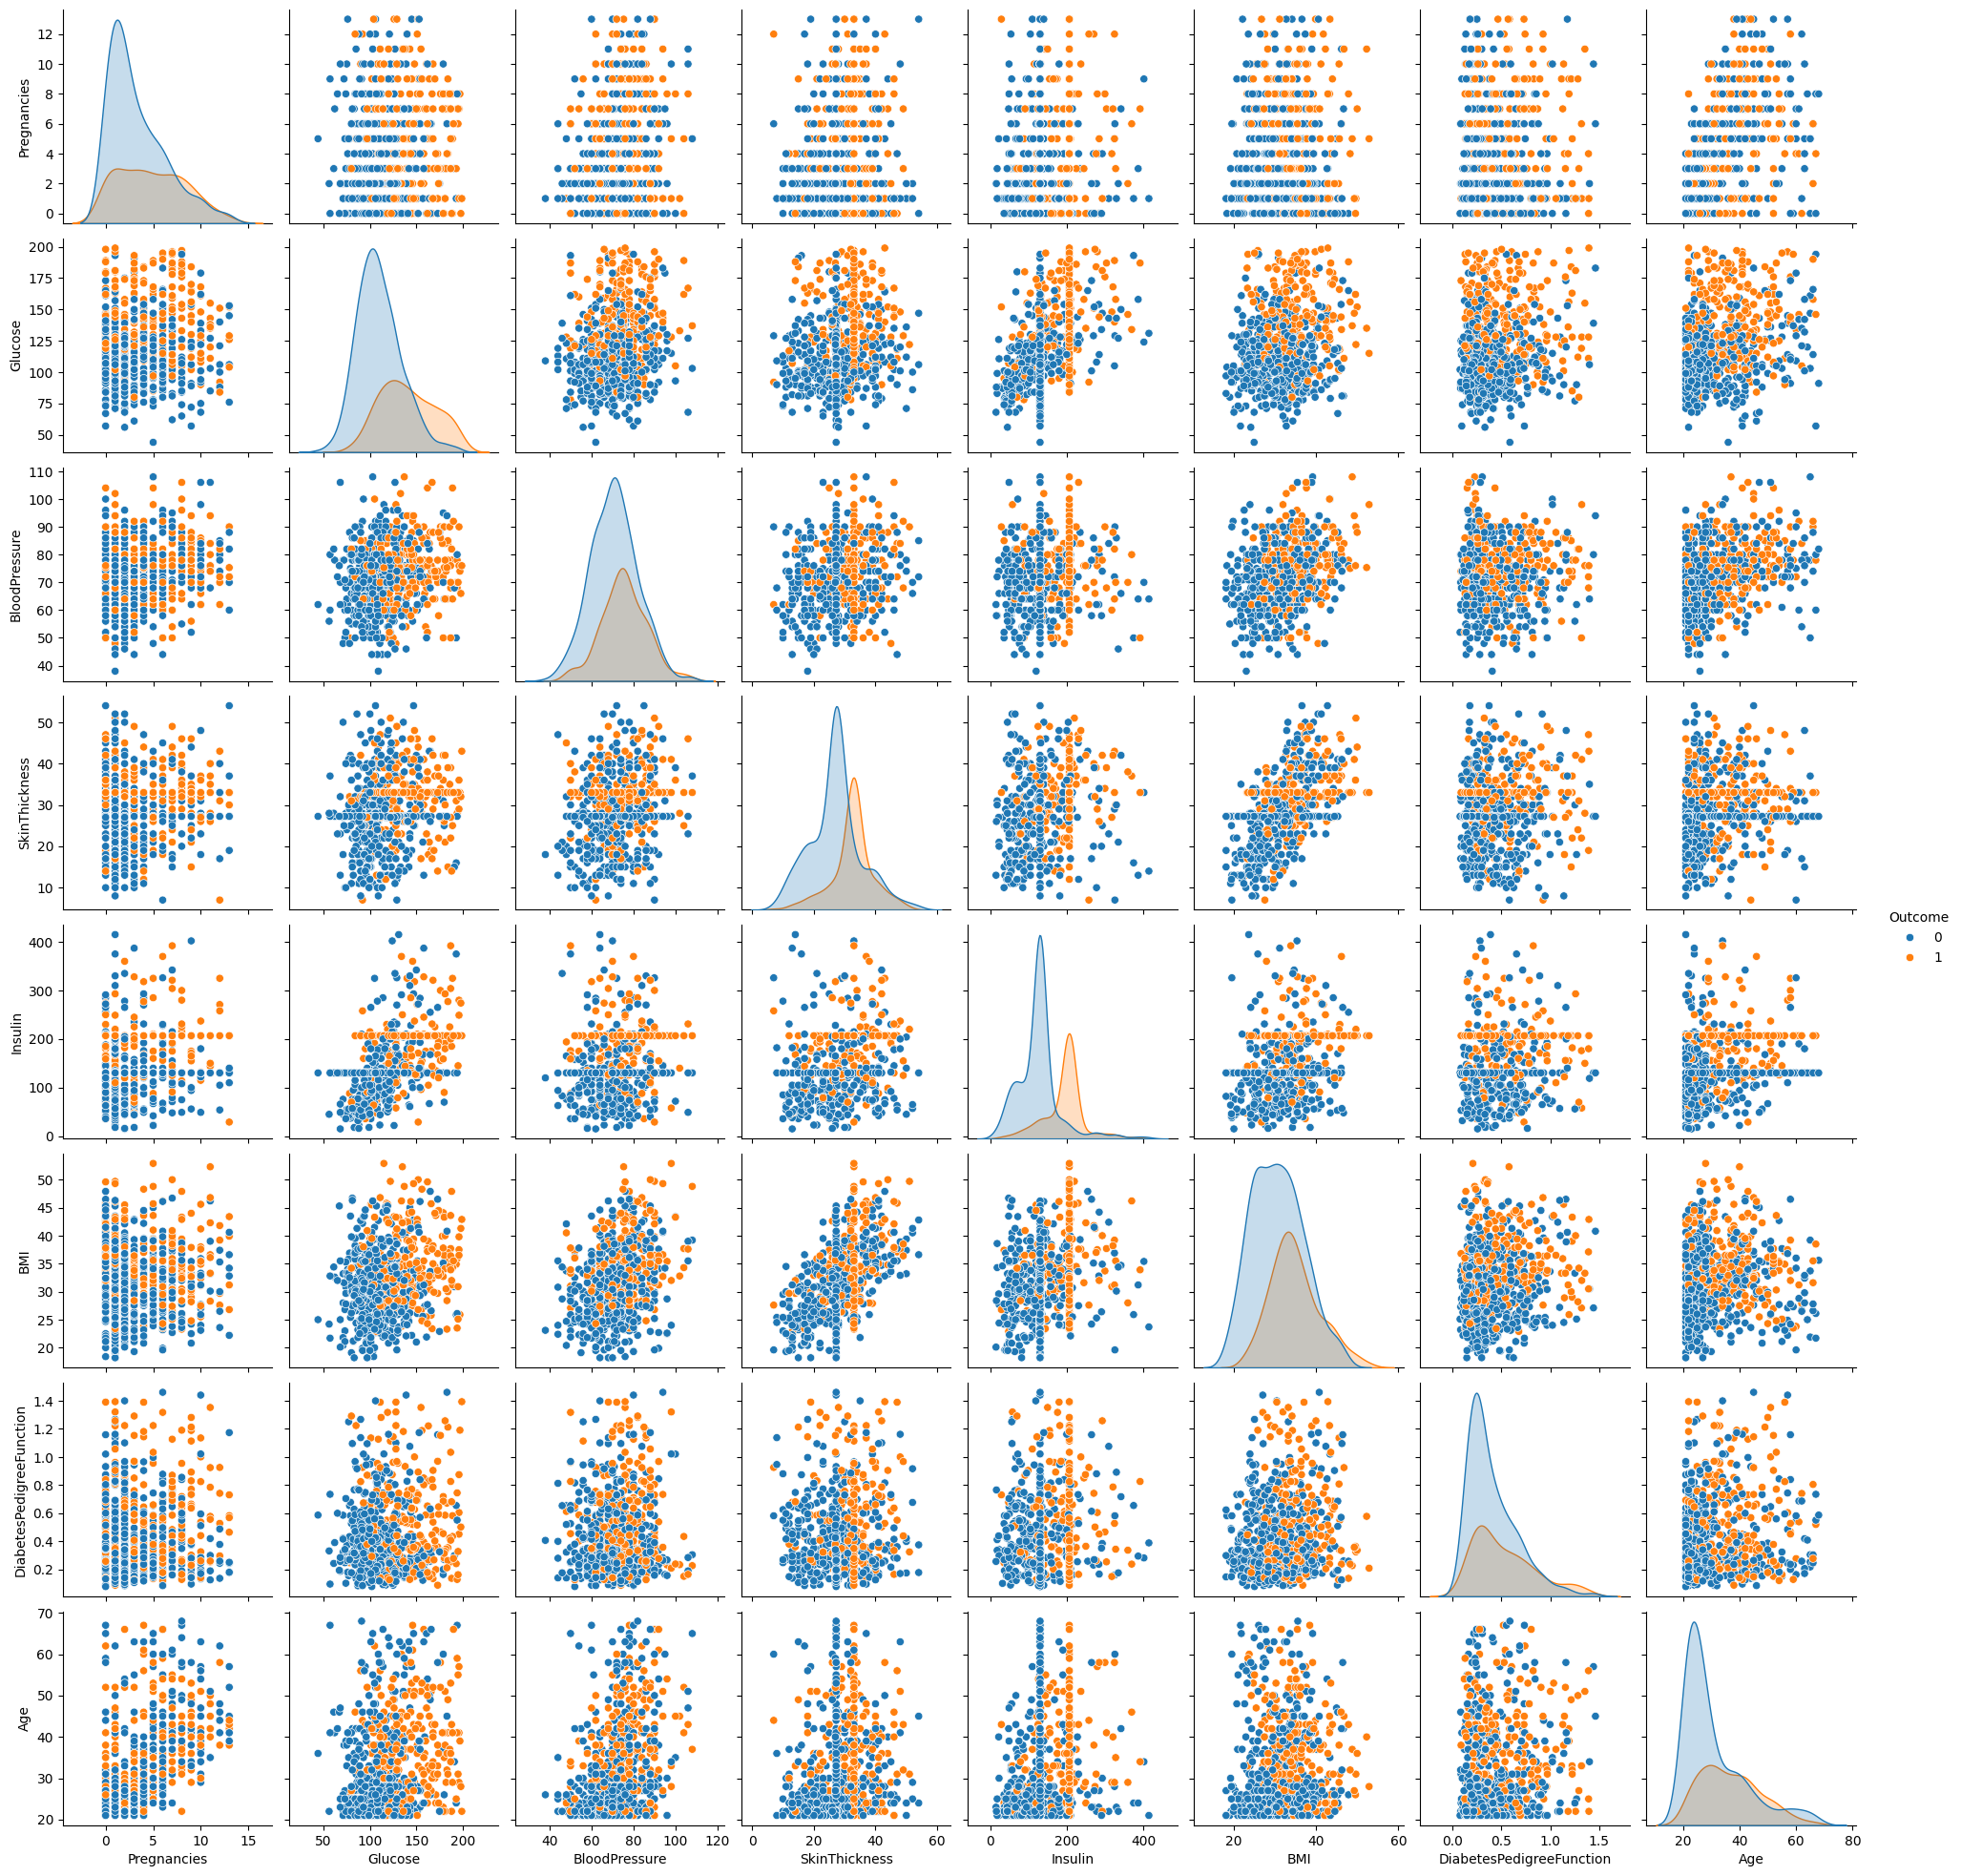

In [13]:
sns.pairplot(Diabetes_Data, height= 2.5, hue= 'Outcome')

<Axes: >

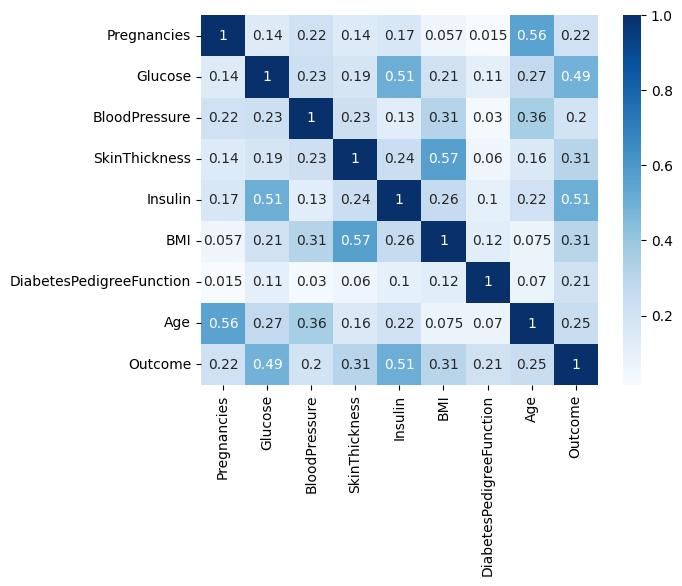

In [15]:
Data_cor= Diabetes_Data.corr()
plt.figure()
sns.heatmap(Data_cor, annot=True, cmap= 'Blues')

In [16]:
Data_cor['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Insulin                     0.505999
Glucose                     0.490512
SkinThickness               0.307488
BMI                         0.306924
Age                         0.246310
Pregnancies                 0.218373
DiabetesPedigreeFunction    0.209538
BloodPressure               0.199934
Name: Outcome, dtype: float64

### Normalizing 


In [17]:
std= StandardScaler()

# Only required for training data 
X= Diabetes_Data.iloc[:,:-1]
Y= Diabetes_Data.iloc[:,-1]

In [18]:
# standardizing data and converting them into a dataframe.
X_std= std.fit_transform(X)
X_df = pd.DataFrame(X_std, columns= Diabetes_Data.columns[:-1])

In [19]:
len(X_df)

720

### Balancing Data

In [20]:
# Making sampler object and making new x, y values 
over = RandomOverSampler()
x, y = over.fit_resample(X_df, Y)

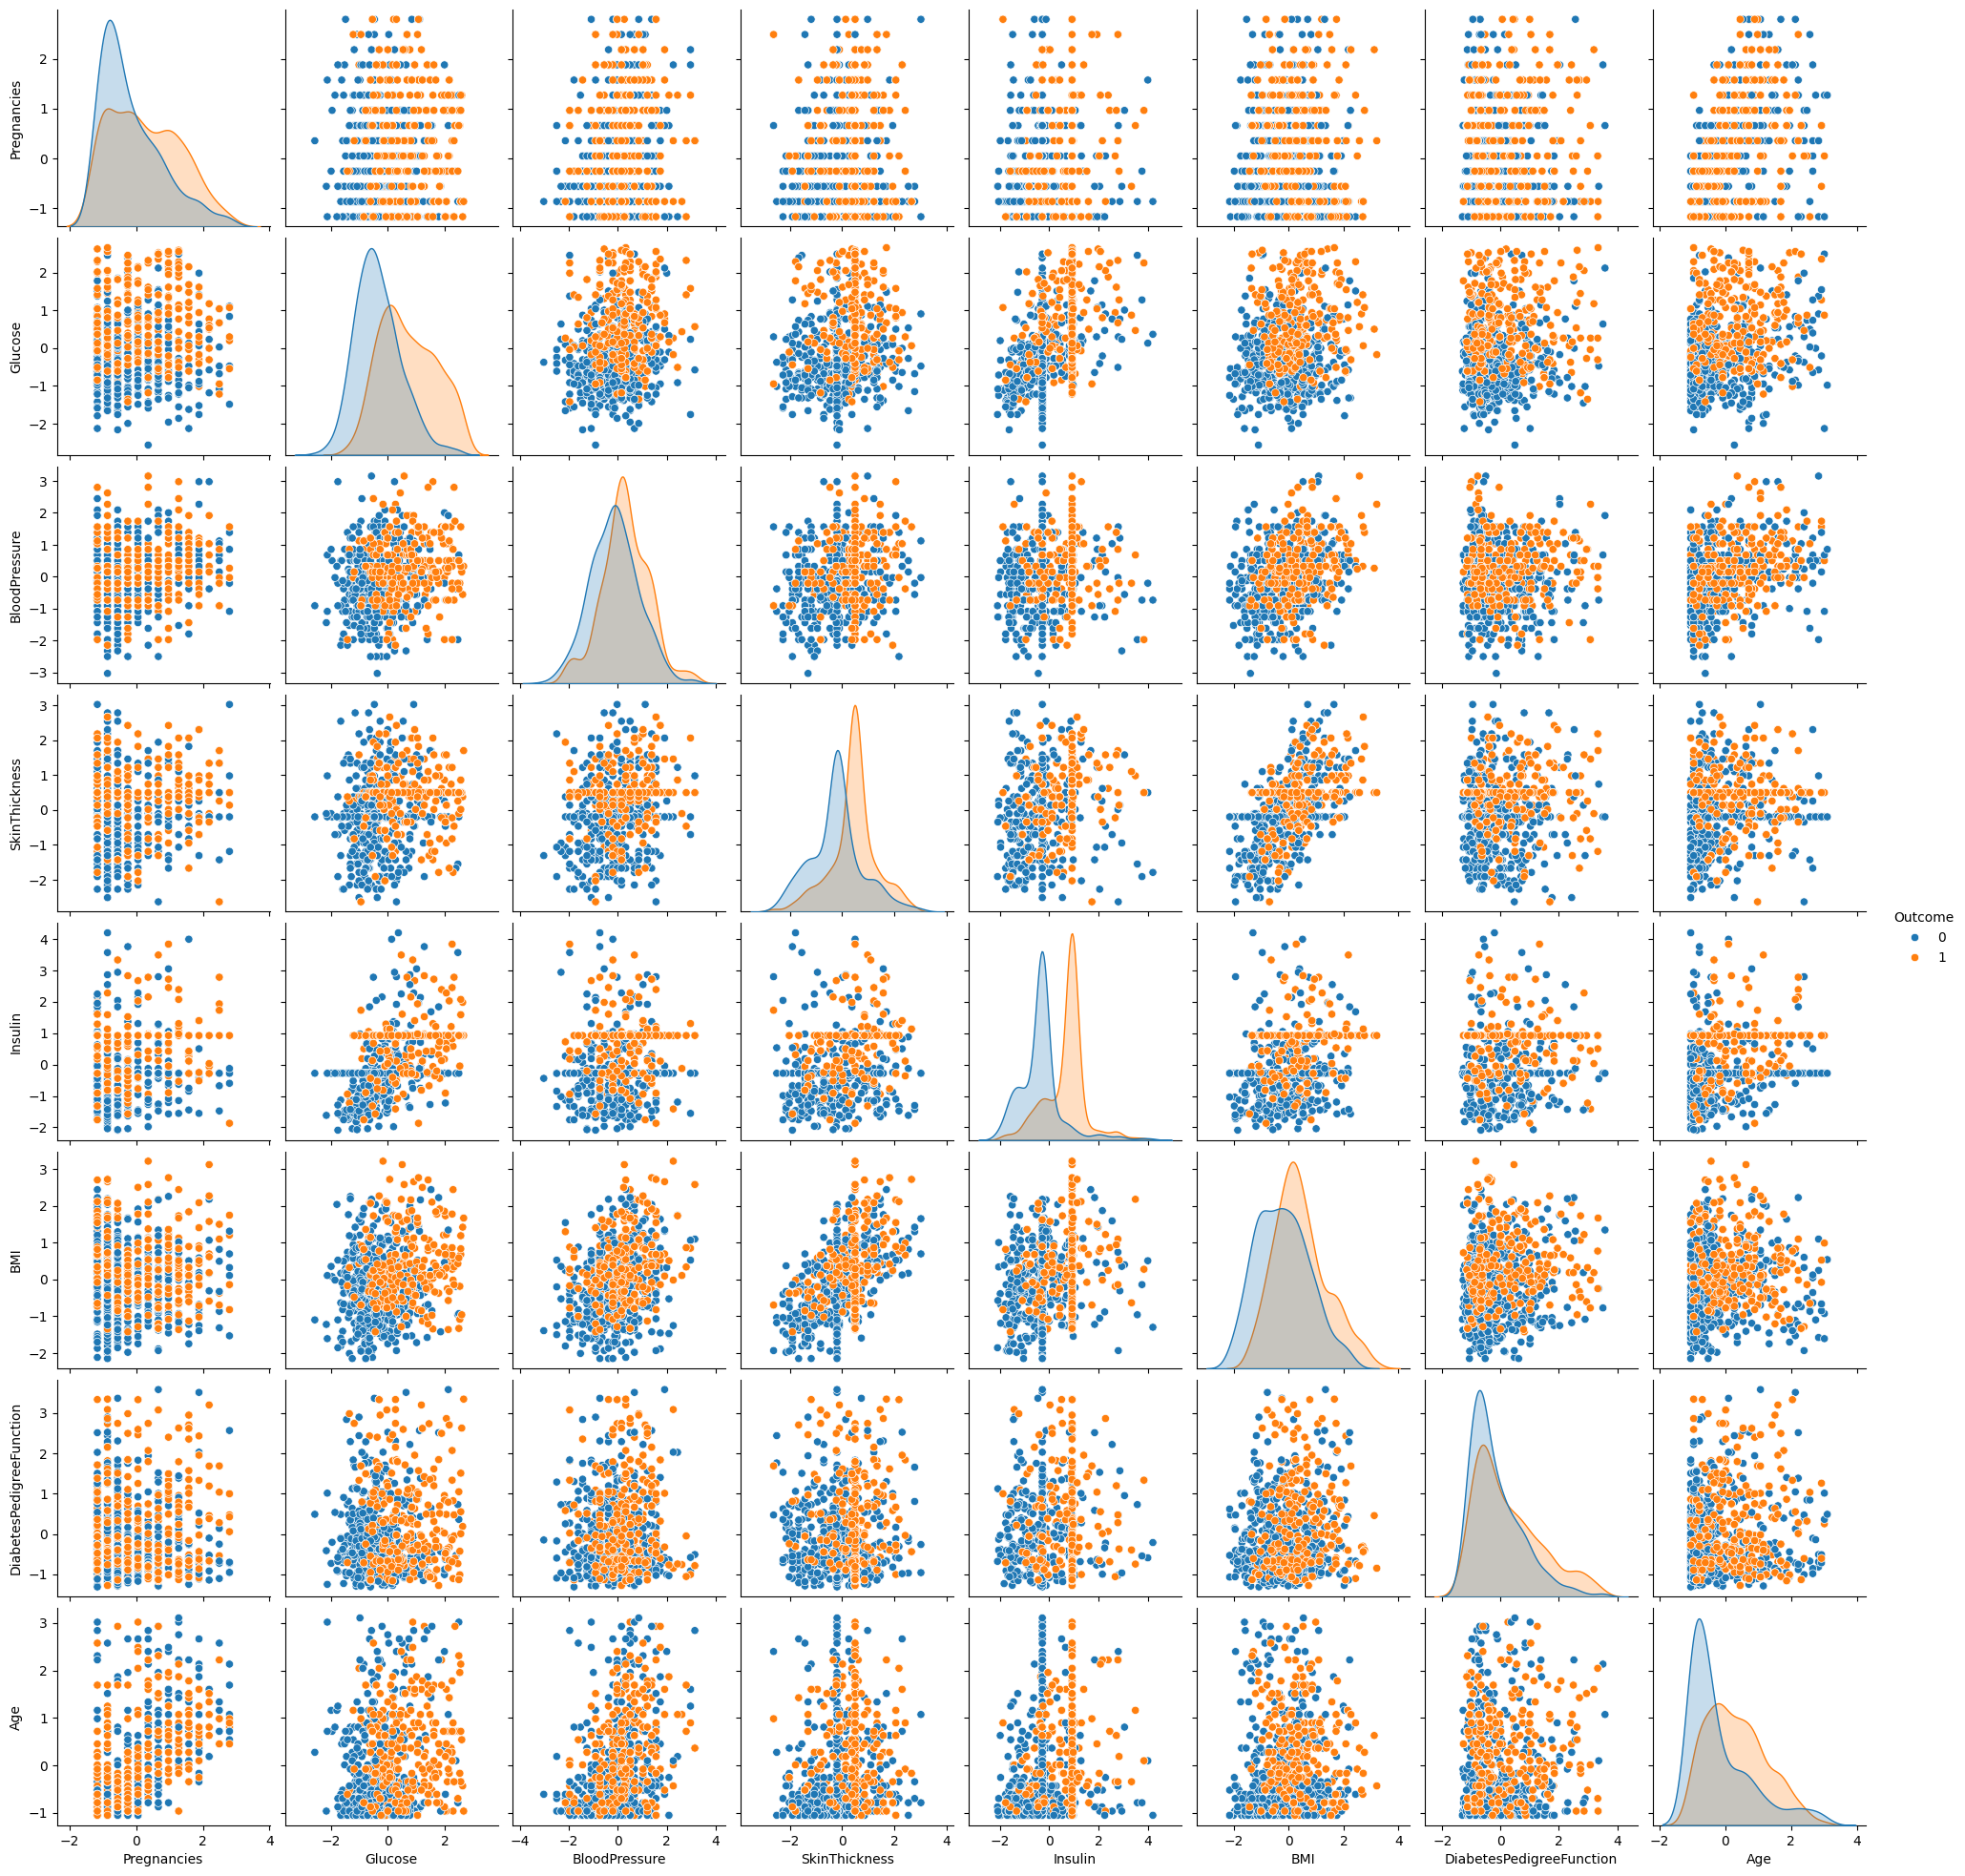

In [21]:
#Visualizing new data 
Plot= x
Plot['Outcome']= y
sns.pairplot(Plot, height= 2.5, hue= 'Outcome')


In [22]:
# removing classes from the dataframe 
x.drop(columns='Outcome', inplace=True) 

In [23]:
x

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.660069  0.942382      -0.026968       0.738710  0.926738  0.228471   
1      -0.866102 -1.183627      -0.556687       0.017276 -0.276303 -0.852267   
2       1.270537  2.123498      -0.733259       0.498232  0.926738 -1.361757   
3      -0.866102 -1.048642      -0.556687      -0.704159 -0.846533 -0.620680   
4       0.354835 -0.137496       0.149604      -0.194891 -0.276303 -1.006658   
..           ...       ...            ...            ...       ...       ...   
951    -0.255634 -1.419850      -1.969269       0.377993 -0.940817 -0.172946   
952    -0.255634 -0.272480       0.149604       0.137515  0.926738 -0.080312   
953     0.354835  0.132474       0.149604       0.498232  0.926738  0.290227   
954    -1.171336  0.368697      -0.556687       1.339906  0.926738  0.336544   
955    -0.560868 -0.609942       1.209041       0.858949 -0.437968  2.065724   

     DiabetesPedigreeFunction       Age  
0                    0.629817  1.512431  
1                   -0.347500 -0.168594  
2                    0.789162 -0.080119  
3                   -0.999045 -1.053344  
4                   -0.878651 -0.257069  
..                        ...       ...  
951                 -0.712224 -0.610969  
952                 -0.892815 -0.699444  
953                 -0.811372  0.450731  
954                 -0.896356 -0.964869  
955                 -1.140685 -0.876394  

[956 rows x 8 columns]

Outcome
1    478
0    478
Name: count, dtype: int64


Text(0.5, 1.0, 'After Balancing The Class')

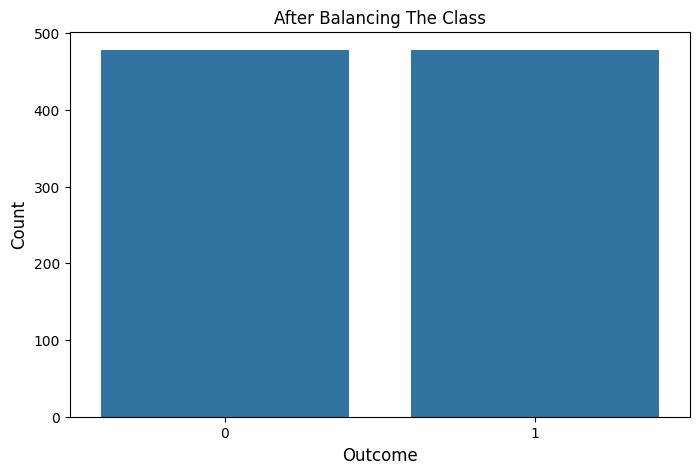

In [24]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('After Balancing The Class', size = 12)

### Splitting into train and test datasets 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state= 20) # splitting data 80% training data and 10% test data

In [26]:
len(X_train)

764

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.8229166666666666


## Training the models

Importing all necessary Libraries

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


## Algorithms

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest=RandomForestClassifier()  # creating Object 
parameters= {'n_estimators': [200, 500],   # Parameters to chec on random forest to get best parameter from them  
                'max_features': ['sqrt', 'log2', None],
                'max_depth': [5,6,7,8,9,10,11,12],
                'criterion': ['gini', 'entropy']
                }


Finding best parameters using grid search

In [36]:
clf= GridSearchCV(estimator= Random_Forest, param_grid= parameters, cv=5)  # creating a classifier 

In [37]:
clf.fit(X_train,Y_train) # fitting the data into classifier to get the best parameters

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 500]})

In [33]:
clf.best_params_ # print the best parameters

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 200}

Creating Classifier with best Params

In [34]:
# creating new classifier with the best parameters
Random_F=RandomForestClassifier(criterion=clf.best_params_['criterion'],max_depth= clf.best_params_['max_depth'], max_features= clf.best_params_['max_features'], n_estimators= clf.best_params_['n_estimators'])

In [35]:
# fitting data into the new optimal classifier
Random_F.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=200)

In [36]:
# making predictions on test data
Y_pred_RF= Random_F.predict(X_test)


Confusion Matrix

C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


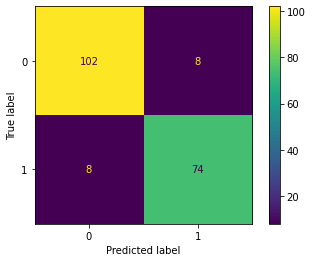

In [37]:
# making a confution matrix and getting true positive true negative false positive and false negative
Matrix = confusion_matrix(Y_test, Y_pred_RF)
TN, FP, FN, TP = Matrix.ravel()

#Plot confusion matrix
ConfusionMatrixDisplay(Random_F,X_test,Y_test)
plt.show()

In [38]:
# calculating the metrics and displaying them.
Accuracy_RF= accuracy_score(Y_test,Y_pred_RF)
Precision_RF=precision_score(Y_test,Y_pred_RF)
recall_RF=recall_score(Y_test,Y_pred_RF)
f1_RF=f1_score(Y_test,Y_pred_RF)

print("Accuracy :",Accuracy_RF)
print("Precision: ",Precision_RF)
print("Recall: ", recall_RF)
print("F1 Score: " , f1_RF)


Accuracy : 0.9166666666666666
Precision:  0.9024390243902439
Recall:  0.9024390243902439
F1 Score:  0.9024390243902439


## KNN


In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier()
k_ran= list(range(1,20))

parameters_Knn= {                         # Parameters to check for KNN 
                'n_neighbors':k_ran,
                'metric':('euclidean', 'manhattan'),
                'weights':('uniform', 'distance'),
}



Finding best parameters using grid search

In [40]:
# creating a classifier using grid search
clf_Knn = GridSearchCV(estimator=KNN, param_grid= parameters_Knn , cv= 5)

In [41]:
# fiting data on this classifier to get the best parameters  
clf_Knn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ('uniform', 'distance')})

In [42]:
# printoing best parameters 
clf_Knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

Creating Classifier with best Params

In [43]:
# Making an optimal classifier with the best parameters 
KNN_opt = KNeighborsClassifier(metric= clf_Knn.best_params_['metric'], n_neighbors= clf_Knn.best_params_['n_neighbors'], weights= clf_Knn.best_params_['weights'])

In [44]:
#fitting data into optimal classifier 
KNN_opt.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [45]:
# predicting values 
Y_pred_knn = KNN_opt.predict(X_test)

Confusion Matrix

C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


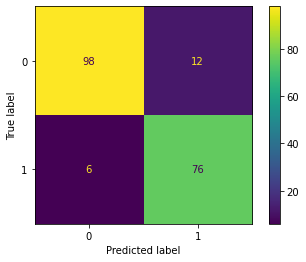

In [46]:
# Creating confution matric and getting true positive true negative false positive and false negative 
Matrix = confusion_matrix(Y_test, Y_pred_knn)
TN, FP, FN, TP = Matrix.ravel()

#Plot confusion matrix
plot_confusion_matrix(KNN_opt,X_test,Y_test )
plt.show()

In [47]:
# Calculating Metrics and displaying  
Accuracy_KNN=accuracy_score(Y_test,Y_pred_knn)
Precision_KNN=precision_score(Y_test,Y_pred_knn)
recall_KNN=recall_score(Y_test,Y_pred_knn)
f1_KNN=f1_score(Y_test,Y_pred_knn)
print("Accuracy :",Accuracy_KNN)
print("Precision: ",Precision_KNN)
print("Recall: ", recall_KNN)
print("F1 Score: " , f1_KNN)

Accuracy : 0.90625
Precision:  0.8636363636363636
Recall:  0.926829268292683
F1 Score:  0.8941176470588236


## SVM

In [48]:
from sklearn.svm import SVC
SVM =SVC()
parameters_SVM= [{                            # parameters to be tested for SVM 
                    'kernel': ['linear','poly', 'sigmoid'],
                    'C': [1,2,3,100,200,300,500],
                    'max_iter': [100, 500 , 1000 , 2000 , 5000, 10000 ]
}]


Finding best parameters using grid search

In [49]:
# classifier with gridsearch 
clf_SVM= GridSearchCV(estimator= SVM ,param_grid=parameters_SVM , cv= 5)

In [50]:
# fitting data to the classifier to get the best parameters 
clf_SVM.fit(X_train,Y_train)

C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 100, 200, 300, 500],
                          'kernel': ['linear', 'poly', 'sigmoid'],
                          'max_iter': [100, 500, 1000, 2000, 5000, 10000]}])

In [51]:
# get best parameters 
clf_SVM.best_params_

{'C': 3, 'kernel': 'linear', 'max_iter': 2000}

Creating Classifier with best Params

In [52]:
# Create a classifier with optimal values 
SVM_opt= SVC(C= clf_SVM.best_params_['C'], kernel= clf_SVM.best_params_['kernel'], max_iter= clf_SVM.best_params_['max_iter'])

In [53]:
#fit data into the optimal classifiers
SVM_opt.fit(X_train, Y_train)

C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=3, kernel='linear', max_iter=2000)

In [54]:
# Predict
Y_pred_SVM = SVM_opt.predict(X_test)

Confusion Matrix

C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


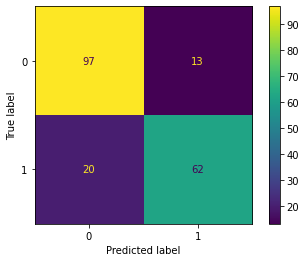

In [55]:
# Creating confution matric and getting true positive true negative false positive and false negative 
Matrix = confusion_matrix(Y_test, Y_pred_SVM)
TN, FP, FN, TP = Matrix.ravel()

#Plot confusion matrix
plot_confusion_matrix(SVM_opt ,X_test,Y_test )
plt.show()

In [56]:
Accuracy_SVM=accuracy_score(Y_test,Y_pred_SVM)
Precision_SVM=precision_score(Y_test,Y_pred_SVM)
recall_SVM=recall_score(Y_test,Y_pred_SVM)
f1_SVM=f1_score(Y_test,Y_pred_SVM)
print("Accuracy :",Accuracy_SVM)
print("Precision: ",Precision_SVM)
print("Recall: ", recall_SVM)
print("F1 Score: " , f1_SVM)

Accuracy : 0.828125
Precision:  0.8266666666666667
Recall:  0.7560975609756098
F1 Score:  0.7898089171974522


# PLOTING

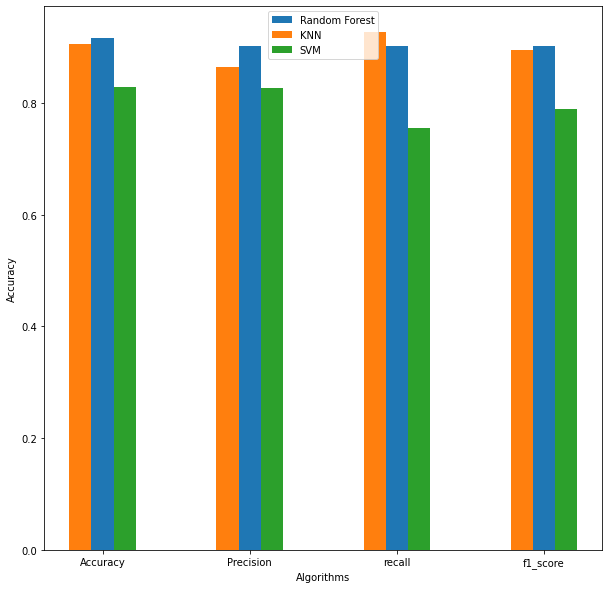

In [57]:
#plotting everthing together to compare between different alorithms  
X= ['Accuracy', 'Precision', 'recall', 'f1_score'] # x-axis Labels  
RF= [Accuracy_RF,Precision_RF,recall_RF,f1_RF]
KNN= [Accuracy_KNN,Precision_KNN,recall_KNN,f1_KNN]
SVM= [Accuracy_SVM,Precision_SVM,recall_SVM,f1_SVM]

len_X= np.arange(len(X))

plt.figure(figsize=(10,10))

plt.bar(len_X  , RF ,0.15, label='Random Forest')
plt.bar(len_X - 0.15, KNN ,0.15, label='KNN')
plt.bar(len_X + 0.15, SVM ,0.15, label='SVM')


plt.xticks(len_X, X)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.legend()
plt.show()